## The prerequisites
(29/12/2021)

This notebook has been built with or makes use of a number of items:
The basic python notebook is the distribution of anaconda3 and I am working under Windows10. Additional packages are installed for specific funcionalities or libraries of auxiliary functions:
<ol>
    <li>Some functionality is used from the Python Data Analysis Library (pandas), which is already in the basic distribution but has to be explicitly imported for its functionality to be used</li>
    <li>The same is true for the 'maths', 'numpy', libraries</li>
    <li>There is a need for plotting so I installed the appropriate library. Within the anaconda distribution (for windows) there is an option to open a command window ("powershell") and typing at the prompt in that the command : "conda install -c conda-forge matplotlib" (without the double quotes) will retrieve the appropriate package from a repository and install it</li>
    <li>to be able to produce LaTeX output from within the code I use a number of packages from the IPython.display library (display, Markdown, Latex)</li>
    </ol>
In the course of installing this a (large) number of other packages are also installed because of the various dependencies within the various utilities: the folder pkgs under anaconda3 ends up containing about 4.5GB (100k+ files and some 15000 subfolders) which includes some other packages that for this particular notebook are not necessary but which I will find useful at some point in the future.

The code itself is all in one cell, with the code for all of the functions that are needed preceding the actual main program.
Below I first outline some of the functions and relationships in the form of LaTeX text. The implementation follows below that.

In the notebook cell containing the code, in particular lines 174-222 are important for the user: here the specific data for the ice are either read from file or put in. Currently only ammonia or cis-methyl formate are part of the possibilities (controlled by a switch 'isw' (line 195)
Running the cel will produce the output: i.e. the values and margins of uncertainty for the 3 parameters $E_S$, $E_A$, and $\zeta$, as well as plots of the model and measured $\mu_Z/\mu$ and spontelectric field.
Note that also the reduced $\chi^2$ is calculated. The high value of this, for ammonia is due to the point at $T=50\ K$ which dominates. For cis-methyl formate the very small observational errors of $\mu_Z/\mu$ in the range $T=70-80\ K$ produce a large $\chi^2$

### Definition of various functions

The basic model equation is
\begin{equation}
\frac{\langle\mu_z\rangle}{\mu} = L\left(\mu \frac{E_z}{T}\right)
\end{equation}
in which:
\begin{equation}
E_z  = E_S\left[1 + \zeta\left(\frac{\langle\mu_z\rangle}{\mu}\right)^2\right]  - E_A\frac{\langle\mu_z\rangle}{\mu}
\end{equation}

In what follows $y\equiv\frac{\langle\mu_z\rangle}{\mu}$.

\begin{equation}
G(T,y)\equiv\left(1-y\right)L^{-1}(y)-\frac{\mu}{T}\left\{ E_S\left[1-y+\zeta_0 h(T)(y^2 -y^3)\right]-E_A(y-y^2) \right\}
\end{equation}
\begin{eqnarray}
\frac{dG}{dy}&=&-L^{-1}(y)+\left(1-y\right)\frac{d L^{-1}(y)}{dy}-\frac{\mu}{T}\left\{E_S\left[-1+\zeta_0 h(T) (2y -3y^2)\right] -E_A(1-2y) \right\} \nonumber\\
\frac{dG}{dT}&=&\frac{\mu}{T^2}\left\{ E_S\left[1-y+\zeta_0 h(T) (y^2 -y^3)\right] -E_A(y-y^2) \right\}-\frac{\mu}{T}
E_S\zeta_0\frac{d h(T)}{dT} (y^2 -y^3)
\end{eqnarray}
in which the Langevin function is:
\begin{equation}
L(x)\equiv \coth(x) -\frac{1}{x}
\end{equation}
and its derivative is
\begin{equation}
\frac{d L(x)}{d x}=-\frac{1}{\sinh(x)^2}+\frac{1}{x^2}
\end{equation}
and an approximate inverse (Petrosyan, 2017) is:
\begin{equation}
L^{-1}(y)\approx 3y+\frac{y^2}{5}\sin\left(\frac{7y}{2}\right)+\frac{y^3}{1-y}
\end{equation}
with derivative
\begin{equation}
\frac{d L^{-1}(y)}{d y}\approx 3+\frac{2y}{5}\sin\left(\frac{7y}{2}\right)+\frac{7 y^2}{10}\cos\left(\frac{7y}{2}\right)+\frac{y^2(3-2y)}{(1-y)^2}
\end{equation}
The function $h(T)$ is used to accomodate that $\zeta$ can be a function of $T$ : a third order polynomial for $cis$-methyl formate or $h(T)\equiv 1$ for ammonia.

The problem reduces to a linear least squares problem, because with:
\begin{eqnarray}
f_0 &\equiv& (1-y)L^{-1}(y) \nonumber\\
f_1 &\equiv& \frac{\partial G}{\partial E_S} = -\frac{\mu}{T}(1-y) \nonumber\\
f_2 &\equiv& \frac{\partial G}{\partial E_A} = \frac{\mu}{T}(1-y)y \\
f_3 &\equiv& \frac{\partial G}{\partial \widetilde{\zeta}_0} = -\frac{\mu h(T)}{T}(1-y)y^2 \nonumber
\end{eqnarray}
a least squares solution requires minimizing for each of the parameters, the equation:
\begin{equation}
\sum_i \left[f_{0i} + E_S f_{1i} +E_A f_{2i} + \widetilde{\zeta}_0 f_{3i}\right]^2
\end{equation}
where $\widetilde{\zeta}_0 \equiv E_S\zeta_0$

An additional complication is the constraint that the electric field is observed $E_{obs}$, for which it should hold that
\begin{equation}
E_{obs} = E_{model} \equiv E_A L\left(\frac{\mu E_z}{T}\right)
\end{equation}
in which
\begin{equation}
E_z=E_S-E_A y+\widetilde{\zeta}_0 h(T) y^2
\end{equation}
The solution is to iterate. With a starting estimate for $E_A$ solve the linear least squares problem for $E_S$ and $\widetilde{\zeta}_0$. Then calculate $E_z$ and adjust $E_A$ to get a best match (in a least squares sense) between
$E_{obs}$ and $E_{model}$. The iteration can converge quite quickly.


$E_S =$(26.55$\pm$0.66) $10^6$<br>$E_A =$(5.51$\pm$0.13) $10^9$<br>$\zeta =$(1.66$\pm$0.11) $10^4$<br><br>reduced $\chi^2 =$46.7<br>

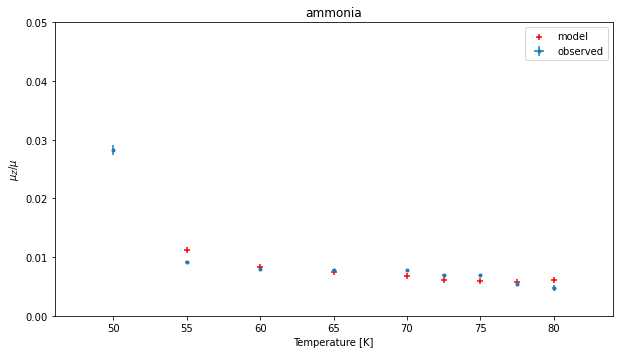

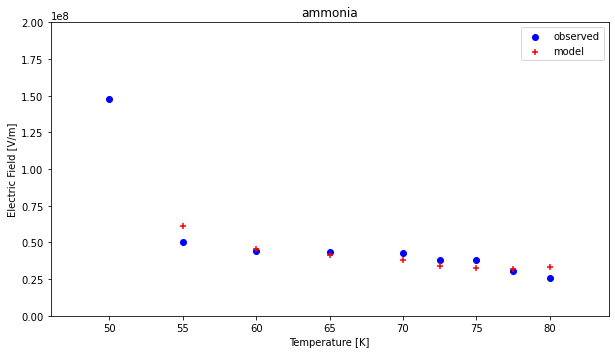

In [3]:
from IPython.display import display, Markdown, Latex
import numpy, math, pandas 
#import markdown
import matplotlib.pyplot as plt

def Langevin(x):
#
# the Langevin function for a single real argument x
# for small absolute values of x (<1.0e-6) an approximation is used that is
# correct to second order, i.e. the error term is O(eps^3)
#
    if (abs(x)>1.0e-6) :
        y=math.cosh(x)/math.sinh(x)-1/x
    else :
        y=x/3.0
    return y

def DerLangevin(x):
#
# the derivative of the Langevin function for a single real argument x
# for small absolute values of x (<1.0e-6) an approximation is used that is
# correct to second order, i.e. the error term is O(eps^2)
#
    if (abs(x)>1.0e-6) :
        auxden=1.0/math.sinh(x)
        y=-1.0*auxden*auxden+1/x/x
    else :
        y=1.0/3.0
    return y

def LangevInv(y):
#
# the inverse of the Langevin function for a single real argument y
# this uses an expression derived by Petrosyan (2017)
#
    if (abs(y)<1.0) :
        x=y*(3.0+y*math.sin(7.0*y/2.0)/5.0+y*y/(1-y))
        return x
    else :
        print("LangevInv: argument out of range, stopping.")
        return

def DerLangevInv(y):
#
# the derivative of the inverse of the Langevin function for a single real argument y
# this uses an expression for the inverse of the Langevin function derived by Petrosyan (2017)
#
    if (abs(y)<1.0) :
        x=3.0+2.0*y*math.sin(7.0*y/2.0)/5.0+7.0*y*y*math.cos(7.0*y/2.0)/10.0
        x+=(3.0-2.0*y)*y*y/(1-y)/(1-y)
        return x
    else :
        print("DerLangevInv: argument out of range, stopping.")
        return
    
def NeaterOut(x,s):
#
# prepares the strings for providing nicer-looking output of parameters with uncertainties
    spon=math.floor(math.log10(abs(s)))+1
    divis=math.exp(spon*math.log(10))
    xout=x/divis
    sout=s/divis
    string='({0:.2f}$\pm${1:.2f}) $10^{2:n}$'.format(xout,sout,spon)
    return string

def ConstrLSQ(x,y,wht):
#
# Solve a linear least squares problem for 1 dependent variable y as a function of
# nvar independent variables x.
# Linear least-squares problems for more than 1 parameter require a matrix inversion
# Here for arbitrary numbers of parameters the required matrix elements are 
# calculated and the matrix is inverted, after which the parameters are obtained.
# Input: a matrix x[nvar,ndat] containing ndat measurements of nvar independent
#           variables x
#        a vector y[ndat] containing the dependent variable
#        a vector of weights [ndat] which is used to give particular measurements 
#           less weight if desired. 
# NOTE: if a constant offset is required as one of the free parameters, an x-variable 
# which is all 1's must be present in (added to) the input matrix x.
#
    if (x.shape[1] != y.shape[0]) :
        print("ConstrLSQ: unequal array lengths, stopping.")
        par=numpy.array([])
        return
    if (x.shape[1] != wht.shape[0]) :
        print("ConstrLSQ: unequal array lengths, stopping.")
        par=numpy.array([])
        return
#
# declaration of local variables
    ndat=xdat.shape[1]
    nvar=xdat.shape[0]
    whtsum=0.0
    ysum=0.0
    xsum=numpy.array([0.0]*nvar)
    xysum=numpy.array([0.0]*nvar)
    xsqsum=numpy.array([[0.0]*2,[0.0]*2])
    Ainv=numpy.array([[0.0]*2,[0.0]*2])
    par=numpy.array([0.0]*nvar)
#
# weighted sum of measurements of dependent variable 
    for i in range(0,ndat):
        ysum+=y[i]*wht[i]
#
# weighted sum of measurements of independent variables and of cross-products on independent variables
# with each other and with dependent variable.
    for k in range(0,nvar):
        for i in range(0,ndat):
            whtsum+=wht[i]
            xsum[k]+=x[k,i]*wht[i]
            xysum[k]+=x[k,i]*y[i]*wht[i]
        for l in range(0,nvar):
            for i in range(0,ndat):
                xsqsum[k,l]+=x[k,i]*x[l,i]*wht[i]
#
# start solving the set of linear equations for the linear least squares problem
    if (nvar==1) :
#
# if only one parameter to be determined
        par[0]=ysum/xsum[0]
    else:
#
# for determination of 3 parameters
        if (nvar==2) :
            Det=xsqsum[0,0]*xsqsum[1,1]-xsqsum[1,0]*xsqsum[0,1]
            if (abs(Det)>1.0e-9) :
                Ainv[0,0]=xsqsum[1,1]/Det
                Ainv[0,1]=-1.0*xsqsum[0,1]/Det
                Ainv[1,0]=-1.0*xsqsum[1,0]/Det
                Ainv[1,1]=xsqsum[0,0]/Det
                par[0]=Ainv[0,0]*xysum[0]+Ainv[0,1]*xysum[1]
                par[1]=Ainv[1,0]*xysum[0]+Ainv[1,1]*xysum[1]
            else :
                print("ConstrLSQ: singular matrix. stopping")
                par=numpy.array([])
                return
        else :
#
# the general case of 3 or more parameters to be determined.
            Ainv=numpy.linalg.inv(xsqsum)
            par=numpy.dot(Ainv,xysum)
#
    return par
            
def FigureE(x,y,z,xmin,xmax,ymin,ymax,title):
#
# make a plot of the measured and modelled field
#
    fig, ax = plt.subplots(figsize=(10, 5.4))
    plt.title(title)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.scatter(x, z, marker='o', color='blue', label='observed')
    ax.scatter(x, y, marker='+', color='red',label='model')
    ax.set_xlabel('Temperature [K]')
    ax.set_ylabel('Electric Field [V/m]')
    ax.legend()
    return

def FigureMu(x,y,z,sigx,sigy,xmin,xmax,ymin,ymax,title):
#
# make a plot of the measured and modelled z-component of mu
#
    fig, ax = plt.subplots(figsize=(10, 5.4))
    plt.title(title)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    ax.errorbar(x, z, xerr=sigx, yerr=sigy, fmt='.', label='observed')
    ax.scatter(x, y, marker='+', color='red',label='model')
    ax.set_xlabel('Temperature [K]')
    ax.set_ylabel('$\mu_Z/\mu$')
    ax.legend()
    return

#
# Main driver programme for fitting Spontelectric field data
# 
# Define several conversion factors to/from atomic units
# conversion of Temp to a.u. : T [a.u.]= T [K]/factor
Ttoau=315770.0
# conversion of D to a.u. : 1 D (=Debye) = factor [a.u.]
Debye=0.393456
# Convert el. field in a.u. To V/m : E [a.u.] = E [V/m]/factor
Etoau=5.142e11
#
# Read the data for a particular ice from file
#  currently setting 
#        isw=0     means Ammonia
#        isw=other means cis-methyl formate
#
# for cis-methyl formate the parameter zeta is not constant but a function of 
# temperature. The T dependence is fixed (cubic with 3 pars)
# for ammonia it is constant. An auxiliary function hTfunc with fixed parameters
# is used to fix the T dependence. the htfc array sets the fixed parameters.
#
isw=0
#
htfc=numpy.array([0.0]*4)
if (isw==0):
# ammonia
    SpontelData = pandas.read_excel("DataForAmmonia.xlsx")
# Provide the value of mu for this ice 
    IceMu=0.577
# Provide a first guess value for the parameter E_A
    EAnxt=5.49e9
#
    htfc[0]=1.0
    htfc[1]=0.0
    htfc[2]=0.0
    htfc[3]=0.0
else :
# cis-methyl formate
    SpontelData = pandas.read_excel("DataForCisMF.xlsx")
# Provide the value of mu for this ice 
    IceMu=0.354
# Provide a first guess value for the parameter E_A
    EAnxt=1.118e9
#
    htfc[0]=1.0
    htfc[1]=-760.113756613971/29449.2222222259
    htfc[2]=-0.245238095233991/29449.2222222259
    htfc[3]=0.157407407407381/29449.2222222259
#
weight=numpy.array(SpontelData.weight)
ndata=len(weight)
# y is the same as <mu_Z>/mu, Temp is the deposition temperature in [K]
# sig are the 1-sigma measurement errors
# E observed is the observed Electric field in units [V/m]
y=numpy.array(SpontelData.y)
sigy=numpy.array(SpontelData.sigma_y)
Temp=numpy.array(SpontelData.Temperature)
sigT=numpy.array(SpontelData.sigma_T)
Eobs=numpy.array(SpontelData.Observed_field)
#
# here comes a block of variable declarations
whtsum=0.0
hTfunc=numpy.array([0.0]*ndata)
DerhTfunc=numpy.array([0.0]*ndata)
DerGT=numpy.array([0.0]*ndata)
DerGy=numpy.array([0.0]*ndata)
PartDerv=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
xdat=numpy.array([[0.0]*ndata,[0.0]*ndata])
ydat=numpy.array([0.0]*ndata)
zdat=numpy.array([0.0]*ndata)
ymodel=numpy.array([0.0]*ndata)
DParDy=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
DParDT=numpy.array([[0.0]*ndata,[0.0]*ndata,[0.0]*ndata])
SigPar=numpy.array([0.0]*3)
#
#
# Auxiliary functions f_0, f_1, f_2, and f_3 are needed as input for linear least-squares
# The are named here as PartDerv[0,], ..., PartDerv[3,] because these are also the
# partial derivatives of the function G with respect to T and y.
for i in range(0,ndata):
    whtsum+=weight[i]
    hTfunc[i]=htfc[0]+Temp[i]*(htfc[1]+Temp[i]*(htfc[2]+Temp[i]*htfc[3]))
    DerhTfunc[i]=htfc[1]+Temp[i]*(2.0*htfc[2]+3.0*Temp[i]*htfc[3])
    PartDerv[0,i]=(1-y[i])*LangevInv(y[i])
    PartDerv[1,i]=Ttoau*Debye*IceMu*(y[i]-1.0)/Temp[i]
    PartDerv[2,i]=-1.0*PartDerv[1,i]*y[i]
    PartDerv[3,i]=PartDerv[1,i]*y[i]*y[i]*hTfunc[i]
#
# start the iteration to get the parameters, initialise a choice for E_A
EAcur=1.1*EAnxt
itcnt=0
while ((abs(EAnxt/EAcur-1.0)>1.0e-3) and (itcnt<20)) :
    itcnt+=1
    EAcur=EAnxt
    for i in range(0,ndata):
        xdat[0,i]=PartDerv[1,i]
        xdat[1,i]=PartDerv[3,i]
        ydat[i]=-1.0*(PartDerv[0,i]+EAcur*PartDerv[2,i]/Etoau)
#
    Constrout=ConstrLSQ(xdat,ydat,weight)
#
    EScur=Constrout[0]*Etoau
    ESzetacur=Constrout[1]*Etoau
    ratiolog=0.0
    for i in range(0,ndata) :
        Ezmod=(EScur-EAcur*y[i]+ESzetacur*hTfunc[i]*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i]
        ratiolog+=weight[i]*(math.log(EAcur*Langevin(Ezmod))-math.log(Eobs[i]))
        DerGy[i]=(EScur-ESzetacur*hTfunc[i]*y[i]*(2.0-3.0*y[i])+EAcur*(1.0-2.0*y[i]))*IceMu*Ttoau*Debye/Etoau/Temp[i]
        DerGy[i]+=-1.0*LangevInv(y[i])+(1.0-y[i])*DerLangevInv(y[i])
        DerGT[i]=(EScur*(1-y[i])-EAcur*y[i]*(1-y[i])+ESzetacur*hTfunc[i]*y[i]*y[i]*(1-y[i]))*IceMu*Ttoau*Ttoau*Debye/Etoau/Temp[i]/Temp[i]
        DerGT[i]+=-1.*ESzetacur*DerhTfunc[i]*y[i]*y[i]*(1-y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i]
    ratiolog=ratiolog/whtsum
    EAnxt=EAcur/math.exp(ratiolog)
#
# G(T,y)\equiv\left(1-y\right)L^{-1}(y)-\frac{\mu}{T}\left\{ E_S\left[1-y+\zeta (y^2 -y^3)\right] 
#          -E_A(y-y^2) \right\}
# dG/dy=-L^{-1}(y)+\left(1-y\right)\frac{\d L^{-1}(y)}{dy}-\frac{\mu}{T}\left\{ 
#           E_S\left[-1+\zeta h(T) (2y -3y^2)\right] -E_A(1-2y) \right\}
# dG/dT=\frac{\mu}{T^2}\left\{ E_S\left[1-y+\zeta_0 h(T) (y^2 -y^3)\right] -E_A(y-y^2) \right\}-\frac{\mu}{T}
#           E_S\zeta_0\frac{d h(T)}{dT} (y^2 -y^3)
#
# for the calculation of the uncertainty margins for the parameters the partial derivatives below are needed
#
# also calculate the quality of the fit (chi-square) dlsqsum
dlsqsum=0
for i in range(0,ndata) :
    ymodel[i]=Langevin((EScur-EAcur*y[i]+ESzetacur*hTfunc[i]*y[i]*y[i])*IceMu*Ttoau*Debye/Etoau/Temp[i])
    DelMod=y[i]-ymodel[i]
    dlsqsum+=weight[i]*DelMod*DelMod/sigy[i]/sigy[i]
   # print(i,weight[i]*DelMod*DelMod/sigy[i]/sigy[i])
    DParDy[0,i]=-1.0*DerGy[i]/PartDerv[1,i]
    DParDy[1,i]=-1.0*DerGy[i]/PartDerv[2,i]
    DParDy[2,i]=-1.0*DerGy[i]/PartDerv[3,i]
    DParDT[0,i]=-1.0*DerGT[i]/PartDerv[1,i]
    DParDT[1,i]=-1.0*DerGT[i]/PartDerv[2,i]
    DParDT[2,i]=-1.0*DerGT[i]/PartDerv[3,i]
#
dlsqsum=dlsqsum/(whtsum-2)
# calculate the 1-sigma uncertainties for the parameters
for k in range(0,3):
    for i in range(0,ndata) :
        SigPar[k]+=weight[i]*(DParDy[k,i]*DParDy[k,i]*sigy[i]*sigy[i]+DParDT[k,i]*DParDT[k,i]*sigT[i]*sigT[i]/Ttoau/Ttoau)
    SigPar[k]=Etoau*math.sqrt(SigPar[k]/whtsum)

if (isw==0):
# ammonia
    FigureMu(Temp,ymodel,y,sigT,sigy,46,84,0.0,0.05,'ammonia')
    ymodel=EAcur*ymodel
    FigureE(Temp,ymodel,Eobs,46,84,0.0,2.0e8,'ammonia')
else:
# cis-methyl formate
    FigureMu(Temp,ymodel,y,sigT,sigy,50,90,0.0,0.04,'cis-methyl formate')
    ymodel=EAcur*ymodel
    FigureE(Temp,ymodel,Eobs,50,90,0.0,5.0e7,'cis-methyl formate')

zetacur=ESzetacur/EScur
SigPar[2]=zetacur*math.sqrt(SigPar[2]*SigPar[2]/ESzetacur/ESzetacur+SigPar[0]*SigPar[0]/EScur/EScur)
string="$E_S =$"+NeaterOut(EScur,SigPar[0])
string+="<br>"+"$E_A =$"+NeaterOut(EAcur,SigPar[1])
string+="<br>"+"$\zeta =$"+NeaterOut(zetacur,SigPar[2])
string+="<br><br>"+"reduced $\chi^2 =$"+'{0:.1f}'.format(dlsqsum)+"<br>"
Markdown(string)





